# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

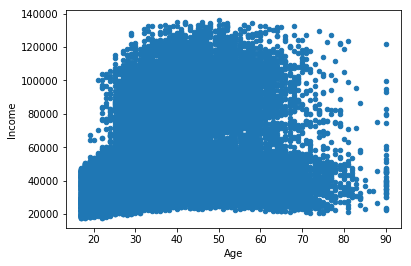

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

In [4]:
from sklearn.linear_model import SGDRegressor

In [5]:
linreg = SGDRegressor(fit_intercept=False, max_iter=5000,tol = 0.0000001)
X = income[["Age"]] 
Y = income["Income"]

In [6]:
linreg.fit(X, Y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=False, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-07, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [7]:
linreg.coef_

array([1684.3523656])

In [8]:
PY = [[30],[40]]

In [9]:
Y_Pred = linreg.predict(PY)
Y_Pred

array([50530.57096791, 67374.09462388])

La predicción teniendo en cuenta la regresión de gradiente descendiente obtenemos los resultados expuestos en ejercicio anterior 

# Exercise 4.2
Evaluate the model using the MSE

In [10]:
from sklearn import metrics
import numpy as np

In [11]:
y_pred = linreg.predict(X)

In [12]:
print('MSE:', metrics.mean_squared_error(income['Income'],y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred)))

MSE: 969432940.1541554
RMSE: 31135.718076738736


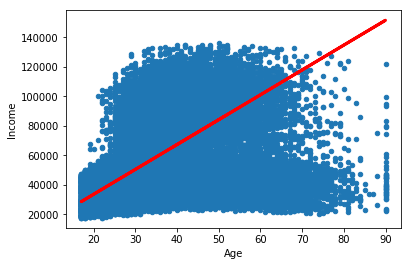

In [13]:
income.plot(x='Age', y='Income', kind='scatter')

plt.plot(X, y_pred, color='red', linewidth=3)

plt.show()

A continuación, mostramos la relación de el modelo y la efectividad para predecir los datos, pero teniendo en cuenta la dispersión de los datos se puede determinar que este modelo no sirve para describir los datos, lo cual se demuestra con la gráfica de la función.


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [14]:
new = income.filter(['Age','Income'], axis=1)
new["Age2"]= new["Age"]**2
new.head()

,Age,Income,Age2
0,39,51806.0,1521
1,50,68719.0,2500
2,38,51255.0,1444
3,53,47398.0,2809
4,28,30493.0,784


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
line = LinearRegression()

In [17]:
line.fit(new[["Age","Age2"]],new[['Income']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
X2= new[["Age","Age2"]]
Y2= [0]

In [19]:
T=line.predict(X2)
T

array([[59457.43730796],
       [64004.91007115],
       [58677.50976818],
       ...,
       [62669.56460721],
       [37890.86149963],
       [64037.59463011]])

In [20]:
print('MSE:', metrics.mean_squared_error(new['Income'],T))
print('RMSE:', np.sqrt(metrics.mean_squared_error(new['Income'], T)))
print('R^2:', metrics.r2_score(new['Income'],T))

MSE: 544646260.781817
RMSE: 23337.65756844112
R^2: 0.1601100007847479


In [21]:
Lcoef = line.coef_
Linter =line.intercept_

In [22]:
print(Lcoef)
print(Linter)

[[3131.77014151  -30.54341041]]
[-16225.07097407]


Se logra determinar que elevar el valor de la edad al cuadrado no representa un cambio significativo dentro de la interpretación del modelo dado que este coeficiente, castiga el valor del ingreso por lo cual no es una variable que aporte para análisis del modelo

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

Se realiza el modelo de regresion con gradiente decendiente 

In [23]:
lreg = SGDRegressor(fit_intercept=False, max_iter=5000,tol = 0.0000001)

In [24]:
LX = income[['Age','Hours per week','Capital Gain' ,'Capital Loss']] 
LY = income["Income"]

Se corre el codigo 

In [25]:
lreg.fit(LX, LY)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=False, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-07, validation_fraction=0.1,
       verbose=0, warm_start=False)

se evalua la regresion VS la primera 

In [26]:
Pred = lreg.predict(LX)

In [27]:
print('MSE:', metrics.mean_squared_error(income['Income'],y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred)))
print('MSE m2:', metrics.mean_squared_error(income['Income'],Pred))
print('RMSE m2:', np.sqrt(metrics.mean_squared_error(income['Income'], Pred)))

MSE: 969432940.1541554
RMSE: 31135.718076738736
MSE m2: 1.778711921373881e+32
RMSE m2: 1.3336835911766632e+16


In [28]:
print('R^2:', metrics.r2_score(income['Income'],y_pred))
print('R^2 m2:', metrics.r2_score(income['Income'],Pred))

R^2: -0.4949465184550035
R^2 m2: -2.7429222631628927e+23


Al ver la regresión y evaluar tanto como el MSE y el R$^2$ podemos ver que el performance de los modelos no describe de manera acertada los datos por lo cual se pasa a realizar la comparación por modelo OLS

In [29]:
lreg2 = LinearRegression()

In [30]:
lreg2.fit(LX,LY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Se evalua el rendimiento de el modelo 

In [31]:
Pred2 = lreg2.predict(LX)

In [32]:
print('MSE:', metrics.mean_squared_error(income['Income'],y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred)))
print('MSE m3:', metrics.mean_squared_error(income['Income'],Pred2))
print('RMSE m3:', np.sqrt(metrics.mean_squared_error(income['Income'], Pred2)))

MSE: 969432940.1541554
RMSE: 31135.718076738736
MSE m3: 518699084.217675
RMSE m3: 22774.9661737987


In [33]:
print('R^2:', metrics.r2_score(income['Income'],y_pred))
print('R^2 m2:', metrics.r2_score(income['Income'],Pred2))

R^2: -0.4949465184550035
R^2 m2: 0.20012271302261875


Se logra determinar que este modelo tiene un mejor performance con respecto al modelo inicial dado que tiene un RMSE menor así mismo se logra determinar, que para los modelos de gradiente descendiente no es válido interpretar el R$^2$  dado que estos arrojan valores negativos por lo cual se interpretaría que los modelos no interpretan los datos 

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [34]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [35]:
list(data)

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [36]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [37]:
data[['Churn?']] = data[['Churn?']].replace(['False.','True.'],[0,1])
data[['Churn?']] = data[['Churn?']].astype('bool')
Y_ = data[['Churn?']]
Y_.dtypes

Churn?    bool
dtype: object

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
Xlog = data[['Night Mins','Night Calls','Night Charge','Day Mins','Day Calls','Day Charge','Intl Mins','Intl Calls','Intl Charge','Eve Mins','Eve Calls','Eve Charge']]
Ylog = data['Churn?']

In [40]:
validation = 0.3
seed = 1
xtra,xval,ytra,yval = train_test_split(Xlog, Ylog,test_size=validation, random_state=seed)

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [41]:
logreg = LogisticRegression(solver='liblinear',C=1e9)

In [42]:
logreg.fit(xtra,ytra)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [43]:
Ypred = logreg.predict(xval)
Ypred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
e = confusion_matrix(yval,Ypred)
dataframe=pd.DataFrame(e, columns=['No','Yes']) 
dataframe

,No,Yes
0,854,1
1,143,2


In [46]:
import numpy as np
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(yval,Ypred)

0.856

Aunque al evaluar el rendimiento del modelo encontramos que este es del 85.6%, podemos apreciar que al ver la matriz de confusión, esta presenta una cantidad considerable de falsos negativos por lo cual podríamos interpretar que hay un overffiting de los datos por lo cual tendríamos que redefinir la muestra de entrenamiento a fin de entrenar mejor al modelo.